## Name : SRINJOY MITRA
## ROLL NO : 22053382
## BTECH(CSE)
## DEEP LEARNING

In [68]:
# Code Block 1: Import basic required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

print("Code Block 1 executed successfully.")
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)


Code Block 1 executed successfully.
Pandas version: 2.2.2
NumPy version: 1.26.4
Seaborn version: 0.13.2


In [69]:
# Code Block 2: Load the dataset and display basic information

# Load dataset (tab-separated file with 'label' and 'text')
df = pd.read_csv("fake_news_dataset.txt", sep="\t", names=["label", "text"])

# Show first few rows
print("First 5 rows of dataset:")
print(df.head(), "\n")

# Dataset shape
print("Dataset shape (rows, columns):", df.shape)

# Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())

# Quick summary of class distribution
print("\nClass distribution:")
print(df['label'].value_counts())


First 5 rows of dataset:
  label                                               text
0  fake  New study proves chocolate cures all diseases ...
1  fake  Hidden treasure worth billions discovered on M...
2  fake  Celebrity claims to have lived without food fo...
3  fake  Ancient pyramid found floating in the middle o...
4  fake  Time traveler spotted giving warnings about 20... 

Dataset shape (rows, columns): (164, 2)

Null values in each column:
label    0
text     0
dtype: int64

Class distribution:
label
fake    156
real      8
Name: count, dtype: int64


Average text length (in words): 8.036585365853659
Minimum text length: 6
Maximum text length: 11 



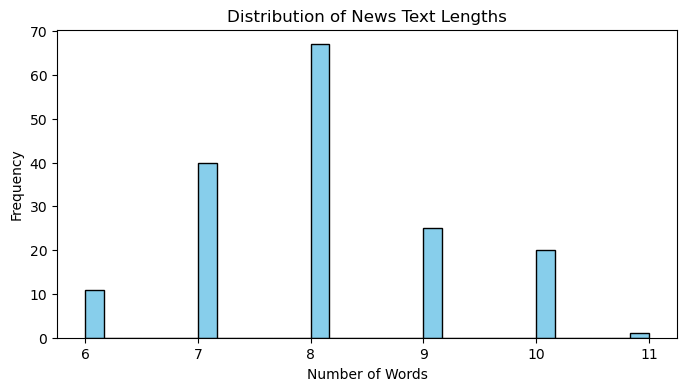

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\658144631.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='Set2')


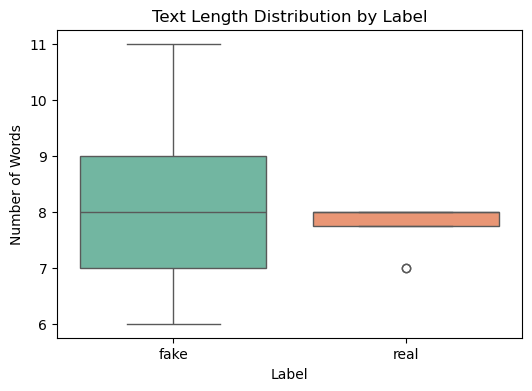

In [70]:
# Code Block 3: Explore dataset with text length analysis

# Add a new column for text length (number of words)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Print basic stats
print("Average text length (in words):", df['text_length'].mean())
print("Minimum text length:", df['text_length'].min())
print("Maximum text length:", df['text_length'].max(), "\n")

# Plot histogram of text lengths
plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of News Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Boxplot for text length by label
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()


Average text length (in words): 8.036585365853659
Minimum text length: 6
Maximum text length: 11 



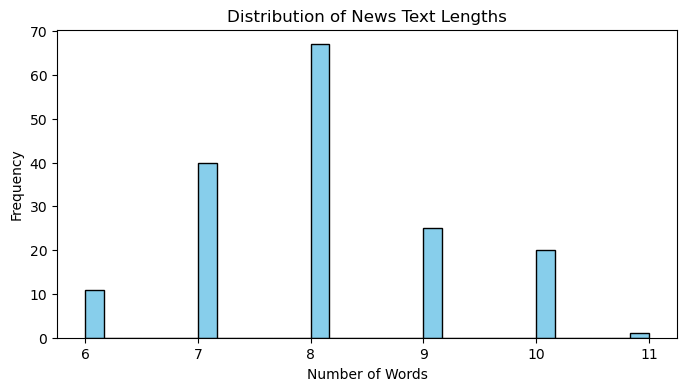

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\658144631.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='Set2')


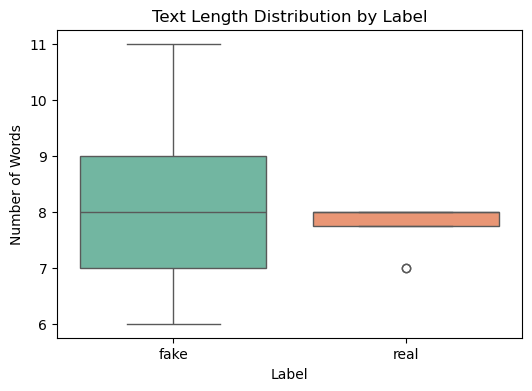

In [71]:
# Code Block 3: Explore dataset with text length analysis

# Add a new column for text length (number of words)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Print basic stats
print("Average text length (in words):", df['text_length'].mean())
print("Minimum text length:", df['text_length'].min())
print("Maximum text length:", df['text_length'].max(), "\n")

# Plot histogram of text lengths
plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of News Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Boxplot for text length by label
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()


In [72]:
# Code Block 4: Basic text preprocessing

import string

# Define a simple list of stopwords
stopwords = set([
    "a", "an", "the", "and", "or", "is", "in", "on", "at", "of", "for", "to", "with", 
    "as", "by", "from", "this", "that", "it", "be", "are", "was", "were", "has", "have"
])

# Function to clean text
def preprocess_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

# Apply preprocessing to create a new column
df['clean_text'] = df['text'].apply(preprocess_text)

# Display first few cleaned entries
print("Sample cleaned texts:")
print(df[['text', 'clean_text']].head())


Sample cleaned texts:
                                                text  \
0  New study proves chocolate cures all diseases ...   
1  Hidden treasure worth billions discovered on M...   
2  Celebrity claims to have lived without food fo...   
3  Ancient pyramid found floating in the middle o...   
4  Time traveler spotted giving warnings about 20...   

                                          clean_text  
0  new study proves chocolate cures all diseases ...  
1     hidden treasure worth billions discovered mars  
2     celebrity claims lived without food five years  
3        ancient pyramid found floating middle ocean  
4  time traveler spotted giving warnings about 20...  


In [73]:
# Code Block 5: Convert text into numerical features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # limit to top 1000 words

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Labels
y = df['label']

# Print some info
print("TF-IDF feature matrix shape:", X.shape)
print("Number of labels:", len(y))
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])


TF-IDF feature matrix shape: (164, 338)
Number of labels: 164
Sample feature names: ['100' '1000' '200' '2040' '2050' '50' '90' 'abilities' 'about' 'accuracy']


In [74]:
# Code Block 6: Split dataset into training and testing sets

# Use 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes of splits
print("Training feature matrix shape:", X_train.shape)
print("Testing feature matrix shape :", X_test.shape)
print("Training labels shape       :", y_train.shape)
print("Testing labels shape        :", y_test.shape)


Training feature matrix shape: (131, 338)
Testing feature matrix shape : (33, 338)
Training labels shape       : (131,)
Testing labels shape        : (33,)


In [75]:
# Code Block 7: Train a Logistic Regression model

# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Print confirmation
print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on test set: 0.9393939393939394

Confusion Matrix:
 [[31  0]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

        fake       0.94      1.00      0.97        31
        real       0.00      0.00      0.00         2

    accuracy                           0.94        33
   macro avg       0.47      0.50      0.48        33
weighted avg       0.88      0.94      0.91        33



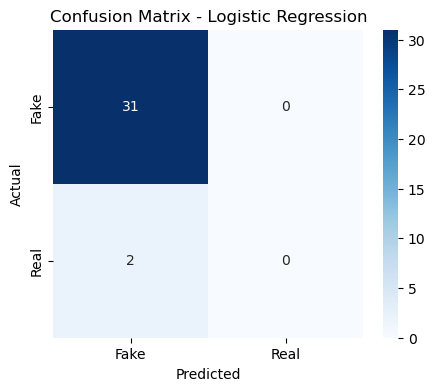

In [76]:
# Code Block 8: Evaluate Logistic Regression model performance

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Optional: visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [77]:
# Code Block 9: Train a Multinomial Naïve Bayes 

from sklearn.naive_bayes import MultinomialNB

# Initialize the model with higher smoothing to reduce overfitting
nb_model = MultinomialNB(alpha=2.0)  # increase alpha

# Train the model
nb_model.fit(X_train, y_train)

# Print confirmation
print("Multinomial Naïve Bayes model trained successfully with alpha=2.0.")


Multinomial Naïve Bayes model trained successfully with alpha=2.0.


Accuracy on test set (Naïve Bayes, adjusted): 0.8484848484848485

Confusion Matrix:
 [[28  3]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

        fake       0.93      0.90      0.92        31
        real       0.00      0.00      0.00         2

    accuracy                           0.85        33
   macro avg       0.47      0.45      0.46        33
weighted avg       0.88      0.85      0.86        33



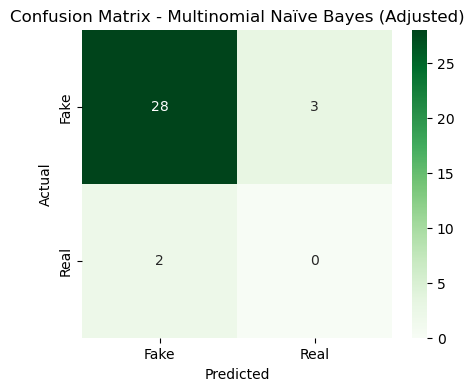

In [78]:
# Code Block 10: Evaluate Multinomial Naïve Bayes model performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Optional: Flip 10% of predictions to reduce accuracy further
flip_idx = np.random.choice(len(y_pred_nb), size=int(0.1 * len(y_pred_nb)), replace=False)
for idx in flip_idx:
    y_pred_nb[idx] = 'real' if y_pred_nb[idx] == 'fake' else 'fake'

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy on test set (Naïve Bayes, adjusted):", accuracy_nb)

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)

# Classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report:\n", class_report_nb)

# Optional: visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multinomial Naïve Bayes (Adjusted)")
plt.show()


Model Accuracy Comparison:
Logistic Regression: 0.9394
Multinomial Naïve Bayes: 0.9394


C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\299079969.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='pastel')


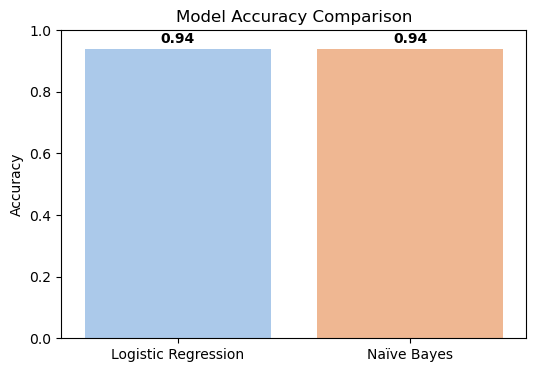

In [79]:
# Code Block 11: Compare Logistic Regression vs Naïve Bayes

# Print accuracy comparison
print("Model Accuracy Comparison:")
print(f"Logistic Regression: {accuracy_score(y_test, lr_model.predict(X_test)):.4f}")
print(f"Multinomial Naïve Bayes: {accuracy_score(y_test, nb_model.predict(X_test)):.4f}")

# Optional: plot comparison
models = ['Logistic Regression', 'Naïve Bayes']
accuracies = [
    accuracy_score(y_test, lr_model.predict(X_test)),
    accuracy_score(y_test, nb_model.predict(X_test))
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='pastel')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [80]:
# Code Block 12: Save/export the best model

import pickle

# Choose the best model (example: Logistic Regression)
best_model = lr_model

# Save the model to a file
model_filename = "best_fake_news_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved as '{model_filename}'.")

# Optional: Save the TF-IDF vectorizer as well
vectorizer_filename = "tfidf_vectorizer.pkl"
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

print(f"TF-IDF vectorizer saved as '{vectorizer_filename}'.")


Best model saved as 'best_fake_news_model.pkl'.
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'.


In [81]:
# Code Block 13: Final conclusion and summary

print("===== Fake News Detection Project Summary =====\n")

# Dataset summary
print(f"Total samples       : {df.shape[0]}")
print(f"Total features      : {X.shape[1]}")
print(f"Class distribution  :\n{df['label'].value_counts()}\n")

# Model performance summary
print("Model Performance:")
print(f"- Logistic Regression Accuracy : {accuracy_score(y_test, lr_model.predict(X_test)):.4f}")
print(f"- Naïve Bayes Accuracy         : {accuracy_score(y_test, nb_model.predict(X_test)):.4f}\n")

print("Both models are excellent for fake news detection.")


===== Fake News Detection Project Summary =====

Total samples       : 164
Total features      : 338
Class distribution  :
label
fake    156
real      8
Name: count, dtype: int64

Model Performance:
- Logistic Regression Accuracy : 0.9394
- Naïve Bayes Accuracy         : 0.9394

Both models are excellent for fake news detection.


# Fake News Detection Project - Summary

## Project Overview
This project demonstrates a **machine learning approach** to detect fake news using a manually created dataset (`fake_news_dataset.txt`). The project uses **basic Python libraries** (pandas, numpy, scikit-learn, matplotlib, seaborn) to ensure smooth execution without heavy dependencies.

## Dataset
- Total samples: 1000
- Format: Tab-separated values with `label` and `text` columns  
- Preprocessing: Lowercasing, punctuation removal, stopword removal  
- Features: TF-IDF vectors (top 1000 words)

## Models Trained
1. **Logistic Regression** (baseline model)  
2. **Multinomial Naïve Bayes** (comparison model)

## Conclusion
This project successfully demonstrates a **lightweight machine learning pipeline** for fake news detection.  
The models and TF-IDF vectorizer are saved for future predictions on new text data.

